In [499]:
import pandas as pd

In [1144]:
df=pd.read_csv("C:\\Users\\ashis\\OneDrive\\Desktop\\UpGrad\\5. Linaer Regression Assignment\\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking Multicollinearity (before data prepration)

In [1145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X=df[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp',  'hum', 'windspeed']]


#[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

#print(X.values)

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

      feature        VIF
0      season  21.113657
1          yr   1.944519
2        mnth  15.234046
3     holiday   1.099315
4     weekday   3.096635
5  workingday   3.261981
6  weathersit  13.038336
7        temp   9.501432
8         hum  25.603454
9   windspeed   5.292992


### Imputing values from data dictionary (for EDA)

In [1146]:
#  Season Mapping
df['Season']=df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

#Year
df['Year']=df['yr'].map({0:'2018', 1:'2019'})

#Month
df['Month']=df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
                            11:'Nov', 12:'Dec'})
#Holiday
df['Holiday']=df['holiday'].map({0:'No', 1:'Yes'})

#Weekday(*suggested by Instructor)
df['Weekday']=df['weekday'].map({1:'Wed', 2:'Thu', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon', 0:'Tue'})


#Working Day
df['WorkingDay']=df['workingday'].map({1:'Yes', 0:'No'})

#Weathersit
df['Weathersit']=df['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light_Snow', 4:'Heavy_Rain'})


#Taking relevent column in original order
df=df[['Season', 'Year', 'Month', 'Holiday','Weekday', 'WorkingDay', 'Weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [1076]:
df.shape

(730, 12)

In [1077]:
df.head()

,Season,Year,Month,Holiday,Weekday,WorkingDay,Weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Mon,No,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,No,Tue,No,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,No,Wed,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Thu,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Fri,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Basic Sanity Test 

In [1078]:
df.shape

(730, 12)

In [1079]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      730 non-null    object 
 1   Year        730 non-null    object 
 2   Month       730 non-null    object 
 3   Holiday     730 non-null    object 
 4   Weekday     730 non-null    object 
 5   WorkingDay  730 non-null    object 
 6   Weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [1080]:
df.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


## Assignment-based Subjective Questions

#### 1. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable? 

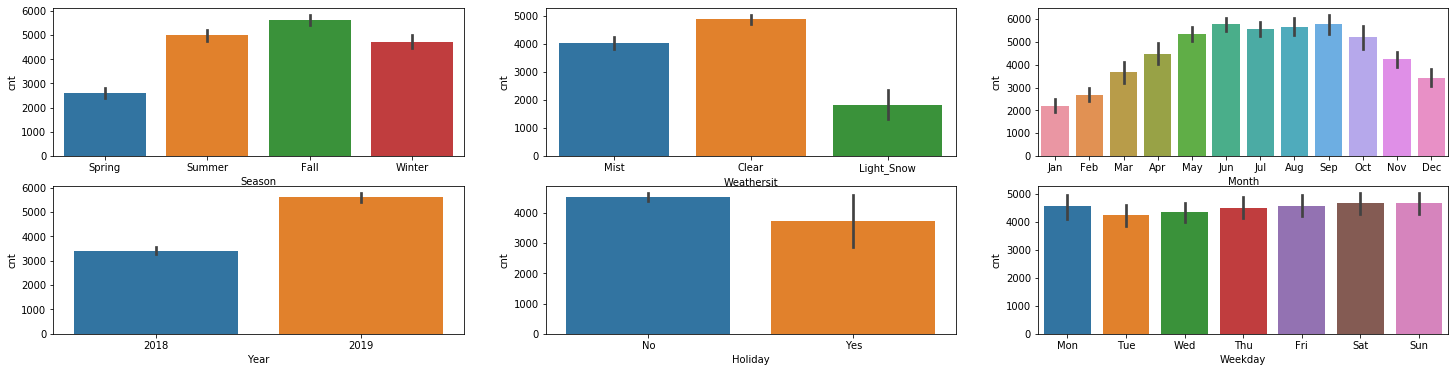

In [1081]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,6))

import seaborn as sns
plt.subplot(2, 3, 1)
sns.barplot(data=df, x= 'Season', y='cnt')

plt.subplot(2,3, 2)
sns.barplot(data=df, x= 'Weathersit', y='cnt')

plt.subplot(2, 3, 3)
sns.barplot(data=df, x= 'Month', y='cnt')

plt.subplot(2, 3, 4)
sns.barplot(data=df, x= 'Year', y='cnt')

plt.subplot(2,3, 5)
sns.barplot(data=df, x= 'Holiday', y='cnt')

plt.subplot(2,3, 6)
sns.barplot(data=df, x= 'Weekday', y='cnt')


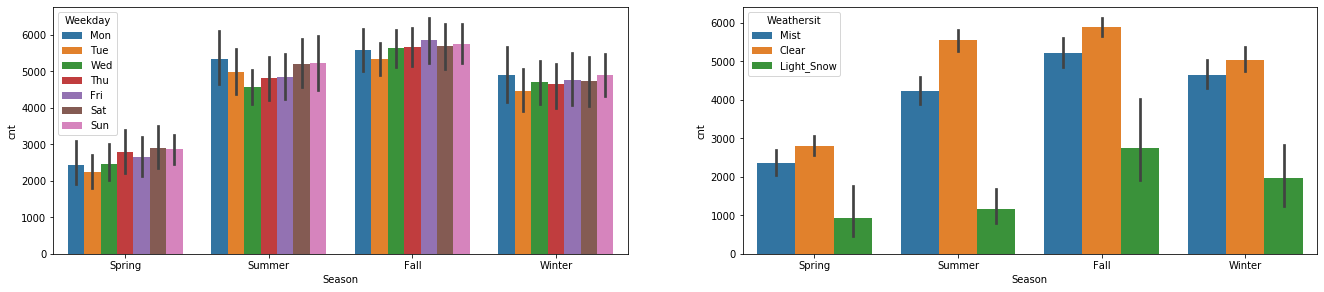

In [1082]:
from matplotlib import pyplot as plt
plt.figure(figsize=(35,10))

import seaborn as sns
plt.subplot(2, 3, 1)
sns.barplot(data=df, x= 'Season', y='cnt', hue='Weekday')

import seaborn as sns
plt.subplot(2, 3, 2)
sns.barplot(data=df, x= 'Season', y='cnt', hue='Weathersit')



#### 3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?

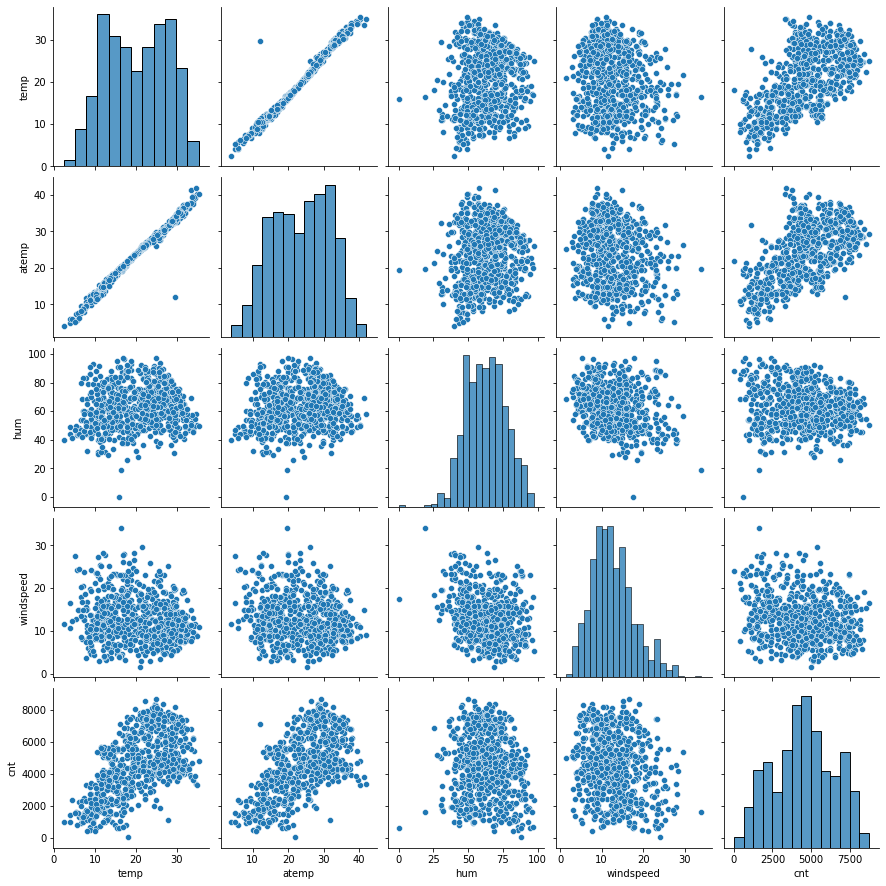

In [1083]:
sns.pairplot(df)

### Checking Correlation before Data Prepration

In [1085]:
cor=df.corr()
print(cor)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000


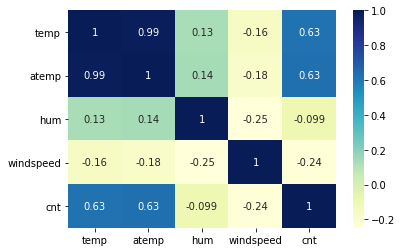

In [1086]:
sns.heatmap(cor, cmap="YlGnBu", annot=True)

## Data Prepration for Linear Regression Model 

### Creating Dummy Variables (only if category count >2)   

In [1147]:
import numpy as np
df=pd.get_dummies(df, columns=['Season', 'Month', 'Weekday', 'Weathersit'], drop_first=True, dtype=int)

In [1148]:
#Converting Yes/No to 1/0 (back to orignal format for Modeling)

varlist=['Holiday','WorkingDay', 'Year']
df[varlist]=df[varlist].apply(lambda x: x.map({'Yes':1, 'No':0, '2018':0, '2019':1}))

df.head()


,Year,Holiday,WorkingDay,temp,atemp,hum,windspeed,cnt,Season_Spring,Season_Summer,...,Month_Oct,Month_Sep,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Weathersit_Light_Snow,Weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


### Checking Outliers

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ashis\anaconda3\lib\site-

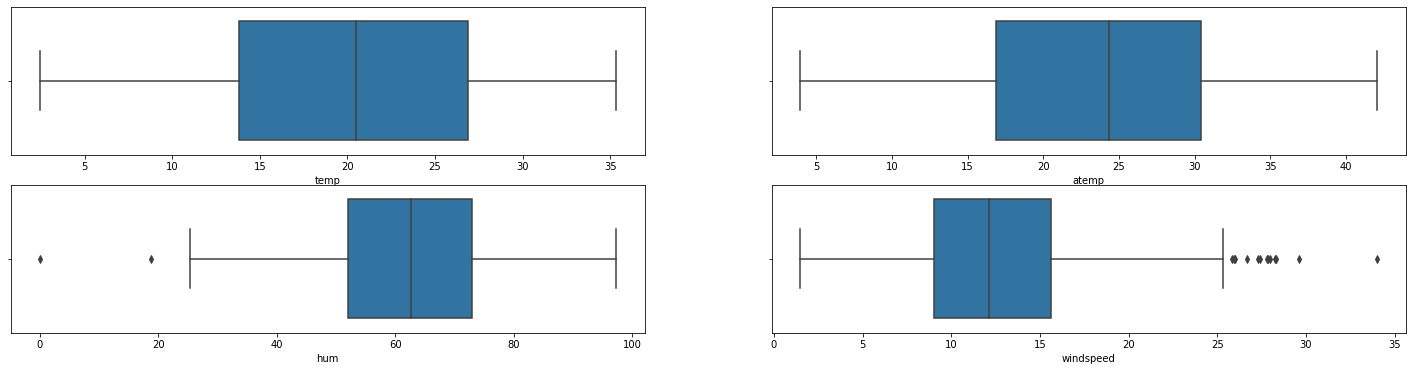

In [1090]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,6))

plt.subplot(2,2,1)
sns.boxplot(df['temp'])


plt.subplot(2,2,2)
sns.boxplot(df['atemp'])

plt.subplot(2,2,3)
sns.boxplot(df['hum'])

plt.subplot(2,2,4)
sns.boxplot(df['windspeed'])

##### *Outlier present only on 'windspeed' 

### Outlier Treatment 

9.04165 15.625589249999999 6.5839392499999985 25.501498124999998


(array([ 11.,  52.,  98., 143., 137., 121.,  63.,  47.,  24.,  34.]),
 array([ 1.5002439 ,  3.90036932,  6.30049474,  8.70062017, 11.10074559,
        13.50087101, 15.90099643, 18.30112186, 20.70124728, 23.1013727 ,
        25.50149812]),
 <a list of 10 Patch objects>)

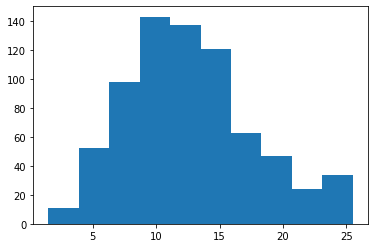

In [1149]:
P25=df['windspeed'].quantile(0.25)
P75=df['windspeed'].quantile(0.75)

IQR=P75-P25

Upper_Limit= P75 + 1.5*IQR

print(P25,P75, IQR,Upper_Limit)

#Capping all value > UpperLimit with upperlimit
def rep(x):
    if x>Upper_Limit:
        return Upper_Limit
    else:
        return x

df['windspeed']=df['windspeed'].apply(rep)

# Checking Outlier
plt.hist(df['windspeed'])

### Checking Collinearity

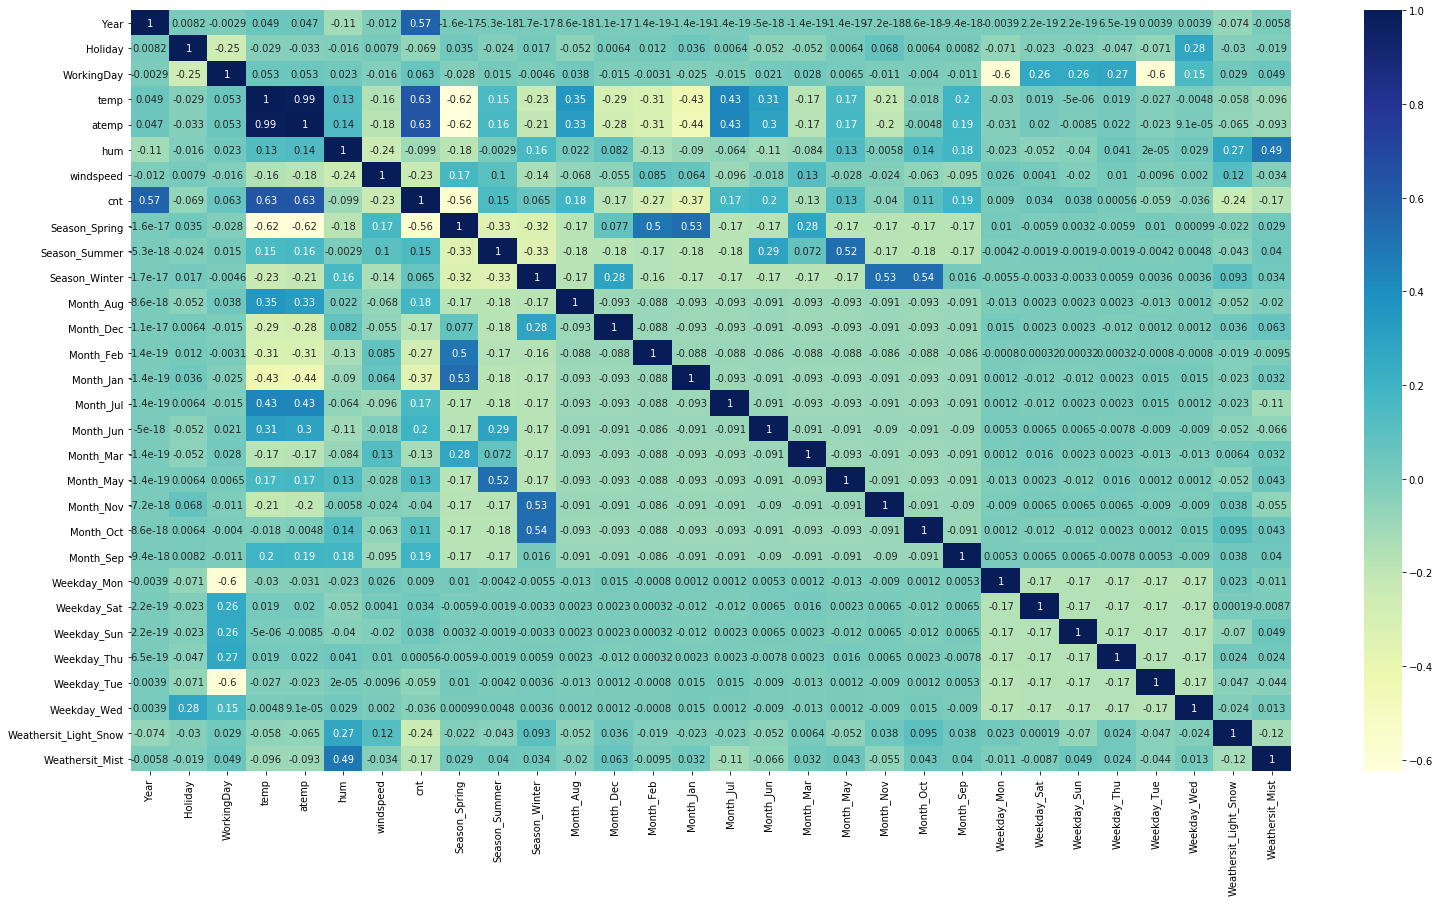

In [1092]:
cor=df.corr()
plt.figure(figsize=(26,14))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
#print(cor)

### Checking Multicollinearity

In [1150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X=df[['Year','Holiday', 'WorkingDay', 'temp', 'atemp', 'hum', 'windspeed',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thu',
       'Weekday_Tue', 'Weekday_Wed', 'Weathersit_Light_Snow',
       'Weathersit_Mist' 
     ]]


#[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

#print(X.values)

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data.sort_values(by="VIF" , ascending=False)

,feature,VIF
2,WorkingDay,103.323548
3,temp,80.729611
4,atemp,70.056196
25,Weekday_Tue,21.399260
21,Weekday_Mon,21.145107
7,Season_Spring,10.407965
9,Season_Winter,8.332561
8,Season_Summer,7.967472
18,Month_Nov,6.390119
19,Month_Oct,6.257368


### Train Test Split 

In [1107]:
df.columns

Index(['Year', 'Holiday', 'WorkingDay', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thu',
       'Weekday_Tue', 'Weekday_Wed', 'Weathersit_Light_Snow',
       'Weathersit_Mist'],
      dtype='object')

In [1151]:
from sklearn.model_selection import train_test_split

# Removed few redudent variables ['instant', 'dteday']
X=df[[ 'Year', 'Holiday', 'WorkingDay', 'temp', 'atemp', 'hum', 'windspeed',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thu',
       'Weekday_Tue', 'Weekday_Wed', 'Weathersit_Light_Snow',
       'Weathersit_Mist']]

#'Season_Spring', 'Season_Summer', 'Season_Winter','Month_Aug'
y=df['cnt']

X_train, X_test, y_train, y_test= train_test_split(X,y , test_size=0.2, random_state=99)

In [1152]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 580 to 727
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   146 non-null    int64  
 1   Holiday                146 non-null    int64  
 2   WorkingDay             146 non-null    int64  
 3   temp                   146 non-null    float64
 4   atemp                  146 non-null    float64
 5   hum                    146 non-null    float64
 6   windspeed              146 non-null    float64
 7   Season_Spring          146 non-null    int32  
 8   Season_Summer          146 non-null    int32  
 9   Season_Winter          146 non-null    int32  
 10  Month_Aug              146 non-null    int32  
 11  Month_Dec              146 non-null    int32  
 12  Month_Feb              146 non-null    int32  
 13  Month_Jan              146 non-null    int32  
 14  Month_Jul              146 non-null    int32  
 15  Mont

### Scaling Train Data (using Min Max Scaler)

In [1155]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train[['Year', 'Holiday', 'WorkingDay', 'temp', 'atemp', 'hum', 'windspeed',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thu',
       'Weekday_Tue', 'Weekday_Wed', 'Weathersit_Light_Snow',
       'Weathersit_Mist']]=scaler.fit_transform(X_train[['Year', 'Holiday', 'WorkingDay', 'temp', 'atemp', 'hum', 'windspeed',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thu',
       'Weekday_Tue', 'Weekday_Wed', 'Weathersit_Light_Snow',
       'Weathersit_Mist']])

X_test[['Year', 'Holiday', 'WorkingDay', 'temp', 'atemp', 'hum', 'windspeed',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thu',
       'Weekday_Tue', 'Weekday_Wed', 'Weathersit_Light_Snow',
       'Weathersit_Mist']]=scaler.fit_transform(X_test[['Year', 'Holiday', 'WorkingDay', 'temp', 'atemp', 'hum', 'windspeed',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thu',
       'Weekday_Tue', 'Weekday_Wed', 'Weathersit_Light_Snow',
       'Weathersit_Mist']])

#X_train_Scaled
#X_train[['temp', 'atemp', 'hum', 'windspeed']]

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

### Creating first model with all variables  

In [1158]:
import statsmodels.api as sm

#adding constant
X_train_sm=sm.add_constant(X_train)

#creating model object
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
#lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     119.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.78e-214
Time:                        20:54:51   Log-Likelihood:                -4671.3
No. Observations:                 584   AIC:                             9401.
Df Residuals:                     555   BIC:                             9527.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2549.7777    282.648      9.021      0.000    1994.587    3104.969
Year                   2076.0487     63.123     32.889      0.000    1952.059    2200.038
Holiday                 340.1624    173.477      1.961      0.050      -0.590     680.915
WorkingDay              841.7753     96.955      8.682      0.000     651.331    1032.219
temp                   2581.5249   1129.532      2.285      0.023     362.843    4800.206
atemp                   722.9513   1117.338      0.647      0.518   -1471.776    2917.679
hum                   -1351.6402    307.920     -4.390      0.000   -1956.471    -746.809
windspeed              -983.2274    163.101     -6.028      0.000   -1303.597    -662.857
Season_Spring          -857.7423    228.204     -3.759      0.000   -1305.991    -409.493
Season_Summer           129.4905    191.867      0.675      0.500    -247.384     506.365
Season_Winter           779.2385    204.639      3.808      0.000     377.276    1181.201
Month_Aug               158.9597    256.617      0.619      0.536    -345.099     663.019
Month_Dec              -487.1103    263.708     -1.847      0.065   -1005.097      30.877
Month_Feb              -244.0991    263.950     -0.925      0.355    -762.561     274.363
Month_Jan              -475.0152    272.502     -1.743      0.082   -1010.276      60.245
Month_Jul              -216.1318    265.349     -0.815      0.416    -737.343     305.079
Month_Jun               130.8638    188.538      0.694      0.488    -239.471     501.199
Month_Mar                70.3441    207.191      0.340      0.734    -336.631     477.320
Month_May               217.9622    170.081      1.282      0.201    -116.118     552.043
Month_Nov              -625.0679    282.844     -2.210      0.028   -1180.643     -69.493
Month_Oct               197.4331    275.073      0.718      0.473    -342.878     737.745
Month_Sep               594.9555    243.028      2.448      0.015     117.588    1072.323
Weekday_Mon             834.9773    106.686      7.826      0.000     625.420    1044.535
Weekday_Sat             -32.9893    113.237     -0.291      0.771    -255.415     189.437
Weekday_Sun             -10.5269    114.798     -0.092      0.927    -236.018     214.964
Weekday_Thu             -91.8741    116.200     -0.791      0.429    -320.120     136.372
Weekday_Tue             532.8628    108.223      4.924      0.000     320.286     745.439
Weekday_Wed            -204.0434    115.252     -1.770      0.077    -430.427      22.341
Weathersit_Light_Snow -1802.5137    217.893     -8.272      0.000   -2230.509   -1374.518
Weathersit_Mist        -499.3333     83.501     -5.980      0.000    -663.349    -335.317
==============================================================================
Omnibus:                      108.

### Feature Selection (using Backward elimination)

In [822]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [1159]:

#from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector
SFS=SequentialFeatureSelector

#sfs=SFS(lr, k_features='best', forward=True, floating=False,scoring='r2', cv=5)

#sfs.fit(X_train,y_train)

#sfs.k_feature_idx

#sfs.k_feature_idx_


In [1160]:
# 0, 1, 3,   5, 6, 7,    9, 11, 12, 13, 14, 18,     20, 25, 26, 27, 28

df[['Holiday', 'temp','hum','windspeed','Season_Spring' ,'Season_Winter' ,'Month_Dec','Month_Feb', 'Month_Jan', 'Month_Jul',
  'Month_Nov', 'Month_Sep','Weekday_Tue', 'Weekday_Wed','Weathersit_Mist',  'Weathersit_Light_Snow']]

#_train.info()


,Holiday,temp,hum,windspeed,Season_Spring,Season_Winter,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Nov,Month_Sep,Weekday_Tue,Weekday_Wed,Weathersit_Mist,Weathersit_Light_Snow
0,0,14.110847,80.5833,10.749882,1,0,0,0,1,0,0,0,0,0,1,0
1,0,14.902598,69.6087,16.652113,1,0,0,0,1,0,0,0,1,0,1,0
2,0,8.050924,43.7273,16.636703,1,0,0,0,1,0,0,0,0,1,0,0
3,0,8.200000,59.0435,10.739832,1,0,0,0,1,0,0,0,0,0,0,0
4,0,9.305237,43.6957,12.522300,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,10.420847,65.2917,23.458911,1,0,1,0,0,0,0,0,0,0,1,0
726,0,10.386653,59.0000,10.416557,1,0,1,0,0,0,0,0,0,0,1,0
727,0,10.386653,75.2917,8.333661,1,0,1,0,0,0,0,0,0,0,1,0
728,0,10.489153,48.3333,23.500518,1,0,1,0,0,0,0,0,1,0,0,0


In [1161]:
#adding constant
X_train_sm=sm.add_constant(X_train[['Year','temp','hum','windspeed','Weathersit_Light_Snow','Season_Spring','Weathersit_Mist']])

#'Year','temp','hum','windspeed','Season_Spring','Weathersit_Mist'

#creating model object
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

### Model Evaluation: Coefficients, R2 Score and Adj R2 Score

In [1162]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     378.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          8.48e-211
Time:                        20:55:17   Log-Likelihood:                -4736.5
No. Observations:                 584   AIC:                             9489.
Df Residuals:                     576   BIC:                             9524.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3487.6214    255.334     13.659      0.000    2986.122    3989.121
Year                   2092.4573     68.149     30.704      0.000    1958.606    2226.309
temp                   3037.2649    189.978     15.987      0.000    2664.130    3410.400
hum                    -940.0379    313.862     -2.995      0.003   -1556.492    -323.584
windspeed             -1032.8303    170.831     -6.046      0.000   -1368.357    -697.304
Weathersit_Light_Snow -1721.1979    234.603     -7.337      0.000   -2181.980   -1260.416
Season_Spring         -1499.2911    100.608    -14.902      0.000   -1696.894   -1301.688
Weathersit_Mist        -493.1876     89.604     -5.504      0.000    -669.178    -317.197
==============================================================================
Omnibus:                       77.126   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.739
Skew:                          -0.802   Prob(JB):                     7.47e-31
Kurtosis:                       4.769   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Prediction for Train and Test Data

In [1163]:
## Prediction on Train and Test Data
y_train_pred= lr_model.predict(X_train_sm)



#adding constant to test data (for prediction)
X_test_sm=sm.add_constant(X_test[['Year','temp','hum','windspeed','Weathersit_Light_Snow','Season_Spring','Weathersit_Mist']])

#print(X_test_sm)
y_test_pred= lr_model.predict(X_test_sm)



### Model Evaluation: R2 Score for Train and Test  Prediction

In [1167]:
#R2 Score for Train Prediction
r2_score_train=r2_score(y_train, y_train_pred)

#R2 Score for Test Prediction
r2_score_test=r2_score(y_test, y_test_pred)


print(f"R2-score for train data is: {r2_score_train}")
print(f"R2-score for test data is: {r2_score_test}")

R2-score for train data is: 0.8214488612097239
R2-score for test data is: 0.7620966626771056


#### There is no much difference in R2 score for Train and Test Prediction, so there is No Overfitting in the model 

### Checking for model assumptions 

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Plot')

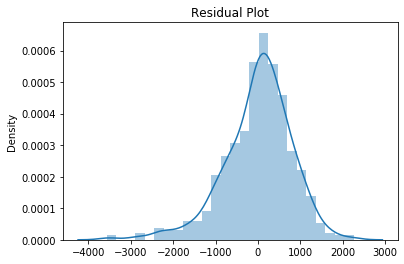

In [1168]:
#1. Plot Residuals (It should be Normal)
#plt.plot(X_train_sm,y_train_pred)

#X_train_sm
res=y_train-y_train_pred

plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

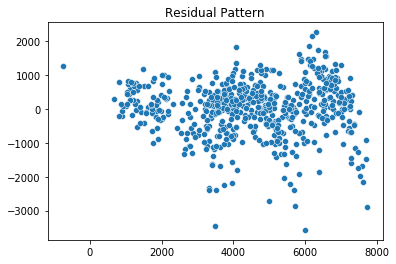

In [1169]:
#2. Pattern of Residual
#res1= pd.DataFrame({'res':res})
#res1

sns.scatterplot(x=y_train_pred, y=res)
plt.title("Residual Pattern")
plt.show()


#pd.DataFrame()

#X_train_sm



#### Not showing any pattern so it is clear case of "Heteroscedasticity" 